# Fussing with SO vs. N

In [1]:
# imports
from importlib import reload
import os
import xarray

import numpy as np
from scipy import stats
from scipy.interpolate import interp1d 

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator 

mpl.rcParams['font.family'] = 'stixgeneral'


import seaborn as sns

import pandas

from siosandbox.cugn import grid_utils
from siosandbox.cugn import utils as cugn_utils
from siosandbox.cugn import figures
from siosandbox.cugn import clusters
from siosandbox.cugn import io as cugn_io
from siosandbox import plot_utils
from siosandbox import cat_utils

from gsw import conversions, density
import gsw


In [14]:
default_bins = dict(SA=np.linspace(32.1, 34.8, 50),
                sigma0=np.linspace(22.8, 27.2, 50),
                SO=np.linspace(0.9, 1.5, 50),
                z=np.linspace(0., 500, 50),
                N=np.linspace(1., 25, 50),
                CT=np.linspace(4, 22.5, 50))

In [15]:
def gen_cb(img, lbl, csz = 17.):
    cbaxes = plt.colorbar(img, pad=0., fraction=0.030)
    cbaxes.set_label(lbl, fontsize=csz)
    cbaxes.ax.tick_params(labelsize=csz)

Saved: fig_jointPDF_90_SO_N_zoom.png


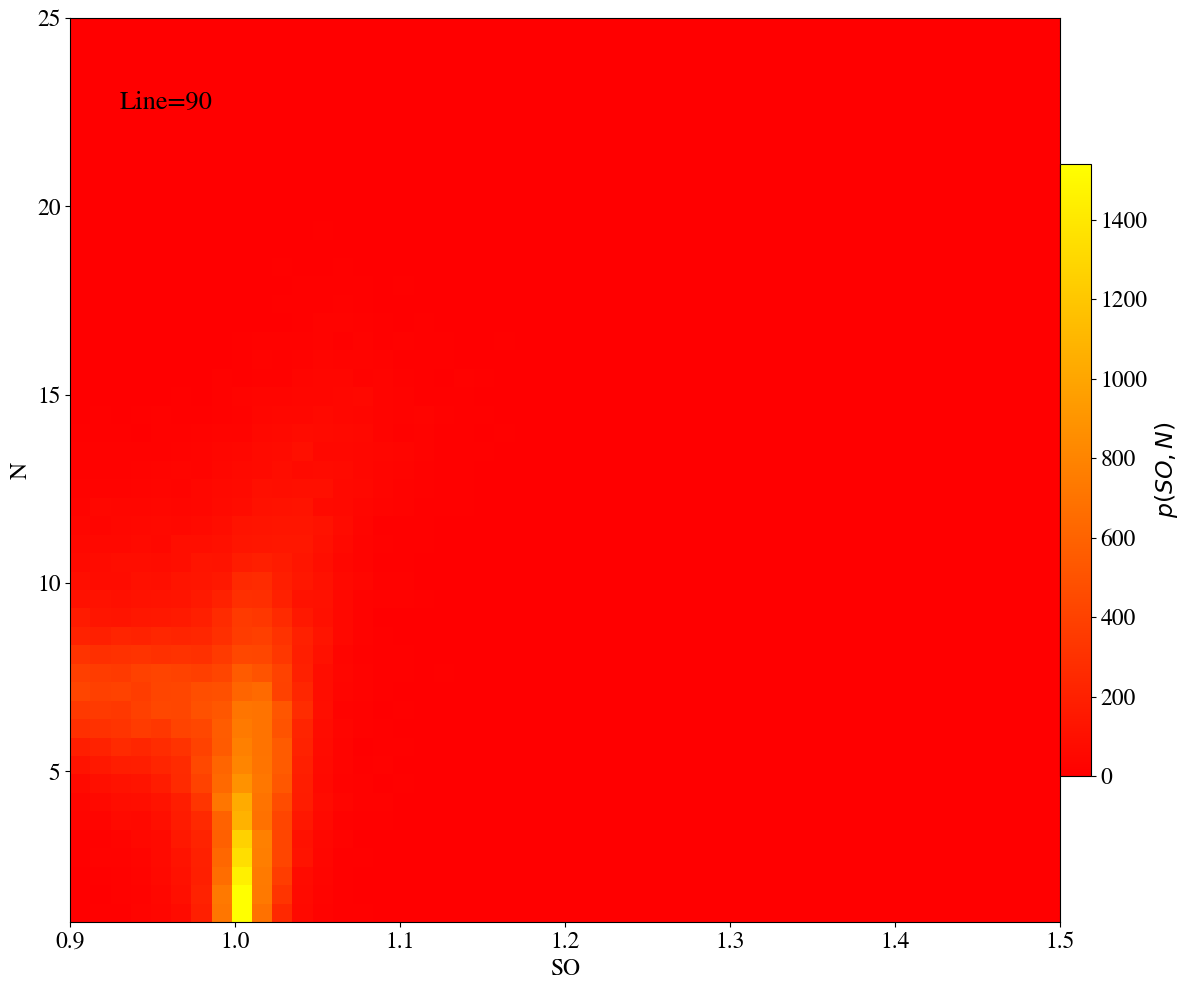

In [17]:
#def fig_joint_pdf(line:str, xvar:str, yvar:str):

line = '90'
xvar = 'SO'
yvar = 'N'


outfile = f'fig_jointPDF_{line}_{xvar}_{yvar}_zoom.png'

# Load
items = cugn_io.load_line(line)
ds = items['ds']

# PDF
_, xedges, yedges, counts, grid_indices, _, _ = grid_utils.gen_grid(
    ds, axes=(xvar, yvar), stat='mean', variable='doxy', bins=default_bins
    )

# PDF
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]

p_norm = np.sum(counts) * (dx * dy)
consv_pdf = counts / p_norm
#embed(header='764 of figs_so')

fig = plt.figure(figsize=(12,10))
plt.clf()
ax = plt.gca()

# #####################################################
# PDF
show_log = False

if show_log:
#    img = ax.pcolormesh(xedges, yedges, np.log10(consv_pdf.T), 
    img = ax.pcolormesh(xedges, yedges, np.log10(counts.T), 
                        cmap='autumn')
    gen_cb(img, r'$\log_{10} \, p('+f'{xvar},{yvar})$')
else:
#    img = ax.pcolormesh(xedges, yedges, consv_pdf.T, 
    img = ax.pcolormesh(xedges, yedges, counts.T, 
                        cmap='autumn')#, vmin=0.01)    
    gen_cb(img, r'$p('+f'{xvar},{yvar})$')


# ##########################################################
tsz = 19.
ax.text(0.05, 0.9, f'Line={line}',
            transform=ax.transAxes,
            fontsize=tsz, ha='left', color='k')

fsz = 17.
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
# Set x-axis interval to 0.5
#ax.xaxis.set_major_locator(MultipleLocator(0.5))
# 
plot_utils.set_fontsize(ax, fsz)

plt.tight_layout()#pad=0.0, h_pad=0.0, w_pad=0.3)
plt.savefig(outfile, dpi=300)
print(f"Saved: {outfile}")